In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler
from sklearn.naive_bayes import ComplementNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from scipy import stats
from sklearn.base import clone
# %matplotlib inline

import pandas as pd


In [ ]:
import pandas as pd
import json

# JSON dosyasının yolu
file_path = '/content/drive/MyDrive/Article_EV/acndata_sessions.json'

# JSON dosyasını oku ve pandas DataFrame'e dönüştür
with open(file_path, 'r') as file:
    data = json.load(file)

# '_items' anahtarındaki verileri normalize ederek DataFrame oluştur
df_ev_sessions = pd.json_normalize(data['_items'])

df=df_ev_sessions.copy()

# DataFrame'in ilk birkaç satırını görüntüle
df.head()


,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,5e225f9ff9af8b5c26d21718,0039,"Thu, 02 Jan 2020 01:12:29 GMT","Thu, 02 Jan 2020 04:38:39 GMT","Thu, 02 Jan 2020 03:11:48 GMT",8.336,2_39_126_20_2020-01-02 01:12:28.778216,0002,CA-310,2-39-126-20,America/Los_Angeles,000001099,"[{'WhPerMile': 400, 'kWhRequested': 24.0, 'mil..."
1,5e225f9ff9af8b5c26d21719,0039,"Thu, 02 Jan 2020 04:18:06 GMT","Fri, 03 Jan 2020 00:06:13 GMT","Thu, 02 Jan 2020 06:41:48 GMT",14.731,2_39_79_382_2020-01-02 04:18:06.407434,0002,CA-491,2-39-79-382,America/Los_Angeles,000003267,"[{'WhPerMile': 400, 'kWhRequested': 40.0, 'mil..."
2,5e23b122f9af8b5fe4b973bf,0039,"Thu, 02 Jan 2020 16:05:15 GMT","Fri, 03 Jan 2020 00:11:51 GMT","Thu, 02 Jan 2020 16:39:20 GMT",2.083,2_39_79_380_2020-01-02 16:05:14.818106,0002,CA-489,2-39-79-380,America/Los_Angeles,000000751,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,5e23b122f9af8b5fe4b973c0,0039,"Thu, 02 Jan 2020 16:06:34 GMT","Thu, 02 Jan 2020 17:04:02 GMT","Thu, 02 Jan 2020 16:37:26 GMT",0.855,2_39_79_383_2020-01-02 16:06:34.210024,0002,CA-492,2-39-79-383,America/Los_Angeles,None,None
4,5e23b122f9af8b5fe4b973c1,0039,"Thu, 02 Jan 2020 16:31:35 GMT","Fri, 03 Jan 2020 00:29:28 GMT","Fri, 03 Jan 2020 00:29:26 GMT",50.788,2_39_78_366_2020-01-02 16:31:34.854057,0002,CA-323,2-39-78-366,America/Los_Angeles,000003853,"[{'WhPerMile': 360, 'kWhRequested': 64.8, 'mil..."


In [ ]:
df.tail()

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
5501,61550519f9af8b76960e169a,0039,"Mon, 13 Sep 2021 21:12:53 GMT","Tue, 14 Sep 2021 00:25:36 GMT","Mon, 13 Sep 2021 21:41:31 GMT",2.285,2_39_89_25_2021-09-13 21:12:53.318460,0002,CA-315,2-39-89-25,America/Los_Angeles,000000431,"[{'WhPerMile': 286, 'kWhRequested': 28.6, 'mil..."
5502,61550519f9af8b76960e169b,0039,"Mon, 13 Sep 2021 21:17:04 GMT","Tue, 14 Sep 2021 01:01:49 GMT","Mon, 13 Sep 2021 23:18:07 GMT",6.715,2_39_123_23_2021-09-13 21:16:44.026068,0002,CA-313,2-39-123-23,America/Los_Angeles,000006481,"[{'WhPerMile': 460, 'kWhRequested': 11.5, 'mil..."
5503,61550519f9af8b76960e169c,0039,"Mon, 13 Sep 2021 22:33:07 GMT","Mon, 13 Sep 2021 23:06:55 GMT",None,17.720,2_39_81_4550_2021-09-13 22:33:04.543952,0002,11900388,2-39-81-4550,America/Los_Angeles,000003905,"[{'WhPerMile': 300, 'kWhRequested': 30.0, 'mil..."
5504,61550519f9af8b76960e169d,0039,"Mon, 13 Sep 2021 23:11:12 GMT","Tue, 14 Sep 2021 01:43:11 GMT","Tue, 14 Sep 2021 00:13:35 GMT",2.018,2_39_91_437_2021-09-13 23:10:59.528292,0002,CA-317,2-39-91-437,America/Los_Angeles,000001082,"[{'WhPerMile': 290, 'kWhRequested': 5.8, 'mile..."
5505,61550519f9af8b76960e169e,0039,"Tue, 14 Sep 2021 01:52:37 GMT","Tue, 14 Sep 2021 03:05:10 GMT",None,45.064,2_39_81_4550_2021-09-14 01:52:31.129163,0002,11900388,2-39-81-4550,America/Los_Angeles,000019055,"[{'WhPerMile': 286, 'kWhRequested': 28.6, 'mil..."


In [ ]:
df.head()

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,5e225f9ff9af8b5c26d21718,0039,"Thu, 02 Jan 2020 01:12:29 GMT","Thu, 02 Jan 2020 04:38:39 GMT","Thu, 02 Jan 2020 03:11:48 GMT",8.336,2_39_126_20_2020-01-02 01:12:28.778216,0002,CA-310,2-39-126-20,America/Los_Angeles,000001099,"[{'WhPerMile': 400, 'kWhRequested': 24.0, 'mil..."
1,5e225f9ff9af8b5c26d21719,0039,"Thu, 02 Jan 2020 04:18:06 GMT","Fri, 03 Jan 2020 00:06:13 GMT","Thu, 02 Jan 2020 06:41:48 GMT",14.731,2_39_79_382_2020-01-02 04:18:06.407434,0002,CA-491,2-39-79-382,America/Los_Angeles,000003267,"[{'WhPerMile': 400, 'kWhRequested': 40.0, 'mil..."
2,5e23b122f9af8b5fe4b973bf,0039,"Thu, 02 Jan 2020 16:05:15 GMT","Fri, 03 Jan 2020 00:11:51 GMT","Thu, 02 Jan 2020 16:39:20 GMT",2.083,2_39_79_380_2020-01-02 16:05:14.818106,0002,CA-489,2-39-79-380,America/Los_Angeles,000000751,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,5e23b122f9af8b5fe4b973c0,0039,"Thu, 02 Jan 2020 16:06:34 GMT","Thu, 02 Jan 2020 17:04:02 GMT","Thu, 02 Jan 2020 16:37:26 GMT",0.855,2_39_79_383_2020-01-02 16:06:34.210024,0002,CA-492,2-39-79-383,America/Los_Angeles,None,None
4,5e23b122f9af8b5fe4b973c1,0039,"Thu, 02 Jan 2020 16:31:35 GMT","Fri, 03 Jan 2020 00:29:28 GMT","Fri, 03 Jan 2020 00:29:26 GMT",50.788,2_39_78_366_2020-01-02 16:31:34.854057,0002,CA-323,2-39-78-366,America/Los_Angeles,000003853,"[{'WhPerMile': 360, 'kWhRequested': 64.8, 'mil..."


In [ ]:
import pandas as pd
import ast

# Örnek olarak, df'inizde pek çok sütun olduğunu ve biz sadece userInputs'u kullanmak istediğimizi varsayalım.
# 1) Sadece userInputs sütununu alıyoruz:
df_userInputs= df[['userInputs']]
df_userInputs.head()

,userInputs
0,"[{'WhPerMile': 400, 'kWhRequested': 24.0, 'mil..."
1,"[{'WhPerMile': 400, 'kWhRequested': 40.0, 'mil..."
2,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,None
4,"[{'WhPerMile': 360, 'kWhRequested': 64.8, 'mil..."


In [ ]:
import pandas as pd
import ast

# Diyelim ki orijinal verinizin adı df,
# ve sadece userInputs sütununu kullanmak istiyorsunuz.
df_userInputs = df[['userInputs']].copy()

# 1) Eğer userInputs sütunundaki veriler string formatında "[{...}, {...}]" şeklindeyse,
#    bunları Python list/dict objesine dönüştürmek için ast.literal_eval kullanabilirsiniz.
def safe_eval(val):
    """
    Eğer val gerçekten str ise, ast.literal_eval ile liste/dict'e çevirir,
    None veya zaten liste/dict ise olduğu gibi döndürür.
    """
    if isinstance(val, str):
        return ast.literal_eval(val)
    return val

df_userInputs['userInputs'] = df_userInputs['userInputs'].apply(safe_eval)

# 2) Bazı satırlar None ya da tek bir dict içerebilir.
#    Explode düzgün çalışsın diye None veya dict gördüğümüzde bunları listeye çeviriyoruz.
def ensure_list(x):
    if x is None:
        return []          # None yerine boş liste
    elif isinstance(x, dict):
        return [x]         # Tek sözlükse liste hâline getiriyoruz
    return x               # Zaten list ise olduğu gibi bırak

df_userInputs['userInputs'] = df_userInputs['userInputs'].apply(ensure_list)

# 3) Artık userInputs sütunundaki her satır bir liste olduğundan explode ile her bir dict'i ayrı satıra açabiliriz.
df_exploded = df_userInputs.explode('userInputs').reset_index(drop=True)

# 4) Şimdi her satırda tek bir dict olduğundan, apply(pd.Series) ile bu dict’in her bir key’ini yeni sütunlara açıyoruz.
df_dict_cols = df_exploded['userInputs'].apply(lambda d: d if isinstance(d, dict) else {}).apply(pd.Series)

# 5) Son olarak bu yeni sütunları orijinal DataFrame’e ekliyoruz.
df_final = pd.concat([df_exploded.drop(columns=['userInputs']), df_dict_cols], axis=1)

# df_final artık userInputs içindeki key’leri sütunlar olarak barındıran yeni DataFrame’tir.
df_final.head()




,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture,userID
0,400.0,24.0,60.0,125.0,"Thu, 02 Jan 2020 01:13:30 GMT",True,"Thu, 02 Jan 2020 03:17:29 GMT",1099.0
1,400.0,40.0,100.0,583.0,"Thu, 02 Jan 2020 04:18:39 GMT",True,"Thu, 02 Jan 2020 14:01:06 GMT",3267.0
2,400.0,8.0,20.0,590.0,"Thu, 02 Jan 2020 16:05:35 GMT",True,"Fri, 03 Jan 2020 01:55:15 GMT",751.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,360.0,64.8,180.0,603.0,"Thu, 02 Jan 2020 16:31:59 GMT",True,"Fri, 03 Jan 2020 02:34:35 GMT",3853.0


In [ ]:

# 4) Her satırda tek bir dict kaldı, apply(pd.Series) ile bu dict içindeki key’leri yeni sütunlar olarak açıyoruz:
df_merged = pd.merge(
    df.reset_index(),       # orijinal df içinde de 'index' sütunu oluşturalım
    df_final.reset_index(), # df_final içinde de 'index' sütunu oluşturalım
    how='left',                       # soldaki (df) tüm satırları koru
    on='index'                        # 'index' sütununu eşleştirerek birleştir
)
# Artık df_final sadece userInputs'tan türetilen sütunları içeriyor.
# İnceleyelim:
df_merged.head()


,index,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,...,userID_x,userInputs,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture,userID_y
0,0,5e225f9ff9af8b5c26d21718,0039,"Thu, 02 Jan 2020 01:12:29 GMT","Thu, 02 Jan 2020 04:38:39 GMT","Thu, 02 Jan 2020 03:11:48 GMT",8.336,2_39_126_20_2020-01-02 01:12:28.778216,0002,CA-310,...,000001099,"[{'WhPerMile': 400, 'kWhRequested': 24.0, 'mil...",400.0,24.0,60.0,125.0,"Thu, 02 Jan 2020 01:13:30 GMT",True,"Thu, 02 Jan 2020 03:17:29 GMT",1099.0
1,1,5e225f9ff9af8b5c26d21719,0039,"Thu, 02 Jan 2020 04:18:06 GMT","Fri, 03 Jan 2020 00:06:13 GMT","Thu, 02 Jan 2020 06:41:48 GMT",14.731,2_39_79_382_2020-01-02 04:18:06.407434,0002,CA-491,...,000003267,"[{'WhPerMile': 400, 'kWhRequested': 40.0, 'mil...",400.0,40.0,100.0,583.0,"Thu, 02 Jan 2020 04:18:39 GMT",True,"Thu, 02 Jan 2020 14:01:06 GMT",3267.0
2,2,5e23b122f9af8b5fe4b973bf,0039,"Thu, 02 Jan 2020 16:05:15 GMT","Fri, 03 Jan 2020 00:11:51 GMT","Thu, 02 Jan 2020 16:39:20 GMT",2.083,2_39_79_380_2020-01-02 16:05:14.818106,0002,CA-489,...,000000751,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",400.0,8.0,20.0,590.0,"Thu, 02 Jan 2020 16:05:35 GMT",True,"Fri, 03 Jan 2020 01:55:15 GMT",751.0
3,3,5e23b122f9af8b5fe4b973c0,0039,"Thu, 02 Jan 2020 16:06:34 GMT","Thu, 02 Jan 2020 17:04:02 GMT","Thu, 02 Jan 2020 16:37:26 GMT",0.855,2_39_79_383_2020-01-02 16:06:34.210024,0002,CA-492,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5e23b122f9af8b5fe4b973c1,0039,"Thu, 02 Jan 2020 16:31:35 GMT","Fri, 03 Jan 2020 00:29:28 GMT","Fri, 03 Jan 2020 00:29:26 GMT",50.788,2_39_78_366_2020-01-02 16:31:34.854057,0002,CA-323,...,000003853,"[{'WhPerMile': 360, 'kWhRequested': 64.8, 'mil...",360.0,64.8,180.0,603.0,"Thu, 02 Jan 2020 16:31:59 GMT",True,"Fri, 03 Jan 2020 02:34:35 GMT",3853.0


In [ ]:
df_merged.drop(['index', "userInputs"], axis=1, inplace=True)

In [ ]:
df_merged.head()

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID_x,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture,userID_y
0,5e225f9ff9af8b5c26d21718,0039,"Thu, 02 Jan 2020 01:12:29 GMT","Thu, 02 Jan 2020 04:38:39 GMT","Thu, 02 Jan 2020 03:11:48 GMT",8.336,2_39_126_20_2020-01-02 01:12:28.778216,0002,CA-310,2-39-126-20,America/Los_Angeles,000001099,400.0,24.0,60.0,125.0,"Thu, 02 Jan 2020 01:13:30 GMT",True,"Thu, 02 Jan 2020 03:17:29 GMT",1099.0
1,5e225f9ff9af8b5c26d21719,0039,"Thu, 02 Jan 2020 04:18:06 GMT","Fri, 03 Jan 2020 00:06:13 GMT","Thu, 02 Jan 2020 06:41:48 GMT",14.731,2_39_79_382_2020-01-02 04:18:06.407434,0002,CA-491,2-39-79-382,America/Los_Angeles,000003267,400.0,40.0,100.0,583.0,"Thu, 02 Jan 2020 04:18:39 GMT",True,"Thu, 02 Jan 2020 14:01:06 GMT",3267.0
2,5e23b122f9af8b5fe4b973bf,0039,"Thu, 02 Jan 2020 16:05:15 GMT","Fri, 03 Jan 2020 00:11:51 GMT","Thu, 02 Jan 2020 16:39:20 GMT",2.083,2_39_79_380_2020-01-02 16:05:14.818106,0002,CA-489,2-39-79-380,America/Los_Angeles,000000751,400.0,8.0,20.0,590.0,"Thu, 02 Jan 2020 16:05:35 GMT",True,"Fri, 03 Jan 2020 01:55:15 GMT",751.0
3,5e23b122f9af8b5fe4b973c0,0039,"Thu, 02 Jan 2020 16:06:34 GMT","Thu, 02 Jan 2020 17:04:02 GMT","Thu, 02 Jan 2020 16:37:26 GMT",0.855,2_39_79_383_2020-01-02 16:06:34.210024,0002,CA-492,2-39-79-383,America/Los_Angeles,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5e23b122f9af8b5fe4b973c1,0039,"Thu, 02 Jan 2020 16:31:35 GMT","Fri, 03 Jan 2020 00:29:28 GMT","Fri, 03 Jan 2020 00:29:26 GMT",50.788,2_39_78_366_2020-01-02 16:31:34.854057,0002,CA-323,2-39-78-366,America/Los_Angeles,000003853,360.0,64.8,180.0,603.0,"Thu, 02 Jan 2020 16:31:59 GMT",True,"Fri, 03 Jan 2020 02:34:35 GMT",3853.0


In [ ]:
df_merged.to_csv('/content/drive/MyDrive/Article_EV/df_merged.csv', index=False)

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5506 entries, 0 to 5505
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   _id                 5506 non-null   object 
 1   clusterID           5506 non-null   object 
 2   connectionTime      5506 non-null   object 
 3   disconnectTime      5506 non-null   object 
 4   doneChargingTime    3925 non-null   object 
 5   kWhDelivered        5506 non-null   float64
 6   sessionID           5506 non-null   object 
 7   siteID              5506 non-null   object 
 8   spaceID             5506 non-null   object 
 9   stationID           5506 non-null   object 
 10  timezone            5506 non-null   object 
 11  userID_x            4815 non-null   object 
 12  WhPerMile           4884 non-null   float64
 13  kWhRequested        4884 non-null   float64
 14  milesRequested      4884 non-null   float64
 15  minutesAvailable    4884 non-null   float64
 16  modifi

In [ ]:
# Convert 'Charging Start Time' column to datetime objects for easier manipulation

df_merged["connectionTime"] = pd.to_datetime(df_merged["connectionTime"])

In [ ]:
# Convert 'Charging End Time' column to datetime objects

df_merged["disconnectTime"] = pd.to_datetime(df_merged["disconnectTime"])

In [ ]:
df_merged.head()

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID_x,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture,userID_y
0,5e225f9ff9af8b5c26d21718,0039,2020-01-02 01:12:29,2020-01-02 04:38:39,"Thu, 02 Jan 2020 03:11:48 GMT",8.336,2_39_126_20_2020-01-02 01:12:28.778216,0002,CA-310,2-39-126-20,America/Los_Angeles,000001099,400.0,24.0,60.0,125.0,"Thu, 02 Jan 2020 01:13:30 GMT",True,"Thu, 02 Jan 2020 03:17:29 GMT",1099.0
1,5e225f9ff9af8b5c26d21719,0039,2020-01-02 04:18:06,2020-01-03 00:06:13,"Thu, 02 Jan 2020 06:41:48 GMT",14.731,2_39_79_382_2020-01-02 04:18:06.407434,0002,CA-491,2-39-79-382,America/Los_Angeles,000003267,400.0,40.0,100.0,583.0,"Thu, 02 Jan 2020 04:18:39 GMT",True,"Thu, 02 Jan 2020 14:01:06 GMT",3267.0
2,5e23b122f9af8b5fe4b973bf,0039,2020-01-02 16:05:15,2020-01-03 00:11:51,"Thu, 02 Jan 2020 16:39:20 GMT",2.083,2_39_79_380_2020-01-02 16:05:14.818106,0002,CA-489,2-39-79-380,America/Los_Angeles,000000751,400.0,8.0,20.0,590.0,"Thu, 02 Jan 2020 16:05:35 GMT",True,"Fri, 03 Jan 2020 01:55:15 GMT",751.0
3,5e23b122f9af8b5fe4b973c0,0039,2020-01-02 16:06:34,2020-01-02 17:04:02,"Thu, 02 Jan 2020 16:37:26 GMT",0.855,2_39_79_383_2020-01-02 16:06:34.210024,0002,CA-492,2-39-79-383,America/Los_Angeles,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5e23b122f9af8b5fe4b973c1,0039,2020-01-02 16:31:35,2020-01-03 00:29:28,"Fri, 03 Jan 2020 00:29:26 GMT",50.788,2_39_78_366_2020-01-02 16:31:34.854057,0002,CA-323,2-39-78-366,America/Los_Angeles,000003853,360.0,64.8,180.0,603.0,"Thu, 02 Jan 2020 16:31:59 GMT",True,"Fri, 03 Jan 2020 02:34:35 GMT",3853.0


In [ ]:
df_merged.drop(['doneChargingTime', "_id", "clusterID", "sessionID","siteID", "spaceID","stationID", "timezone", "userID_x", "modifiedAt","requestedDeparture", "userID_y"], axis=1, inplace=True)

In [ ]:
df_merged.head()

,connectionTime,disconnectTime,kWhDelivered,WhPerMile,kWhRequested,milesRequested,minutesAvailable,paymentRequired
0,2020-01-02 01:12:29,2020-01-02 04:38:39,8.336,400.0,24.0,60.0,125.0,True
1,2020-01-02 04:18:06,2020-01-03 00:06:13,14.731,400.0,40.0,100.0,583.0,True
2,2020-01-02 16:05:15,2020-01-03 00:11:51,2.083,400.0,8.0,20.0,590.0,True
3,2020-01-02 16:06:34,2020-01-02 17:04:02,0.855,NaN,NaN,NaN,NaN,NaN
4,2020-01-02 16:31:35,2020-01-03 00:29:28,50.788,360.0,64.8,180.0,603.0,True


In [ ]:
import pandas as pd
import numpy as np

# 1) Scikit-learn ve Keras kütüphanelerini içe aktaralım
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ------------------------------------------------------------------------------
# ÖRNEK: kWhDelivered'i tahmin edeceğimiz bir DataFrame (df_merged) olduğunu varsayıyoruz.
# df_merged'in ilk 5 satırı soruda gösterildiği gibi:
#   connectionTime | disconnectTime | kWhDelivered | WhPerMile | kWhRequested | milesRequested | minutesAvailable | paymentRequired
# ------------------------------------------------------------------------------
df = df_merged.copy()

# 2) Temel Veri Ön İşleme (Missing Values vb.)
# ------------------------------------------------
# - Önce hedef sütun (kWhDelivered) boş olan satırları atıyoruz (model eğitmek için gerekli)
df = df.dropna(subset=['kWhDelivered'])

# - Girdi (feature) sütunlarımızdan bazıları da (örneğin WhPerMile, kWhRequested vb.) eksik olabilir
#   Basitçe bu boşlukları 0 ile dolduruyoruz (veya kendi stratejinize göre doldurun)
df[['WhPerMile', 'kWhRequested', 'milesRequested', 'minutesAvailable']] = \
    df[['WhPerMile', 'kWhRequested', 'milesRequested', 'minutesAvailable']].fillna(0)

# 3) Özellik (Feature) ve hedef (Target) sütunlarını ayırma
# ------------------------------------------------
# - Örnek olarak sadece bu dört sütunu girdi (X) olarak alıyoruz
X = df[['WhPerMile', 'kWhRequested', 'milesRequested', 'minutesAvailable']]
y = df['kWhDelivered']

# 4) Eğitim ve Test seti oluşturma (Train/Test Split)
# ------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5) İsteğe bağlı: Özellikleri ölçeklendirme (StandardScaler)
# ------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# ==============================================================================
# BÖLÜM A) KLASİK MAKİNE ÖĞRENMESİ İLE REGRESYON
# ==============================================================================

# 6) Basit bir Linear Regression modeli kurup eğitelim
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# 7) Modelin tahminleri ve performans metrikleri
y_pred_lr = lin_reg.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("=== Linear Regression Sonuçları ===")
print(f"MSE (Mean Squared Error): {mse_lr:.4f}")
print(f"R^2 (Coefficient of Determination): {r2_lr:.4f}\n")

# ==============================================================================
# BÖLÜM B) DERİN ÖĞRENME (Yapay Sinir Ağı) İLE REGRESYON
# ==============================================================================
# 8) Keras/TensorFlow ile basit bir tam bağlantılı (dense) yapay sinir ağı modeli kuralım
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))  # 1. katman
model.add(Dense(32, activation='relu'))                                         # 2. katman
model.add(Dense(1, activation='linear'))                                        # Çıkış katmanı (regresyon)

# 9) Modeli derleyelim (compile)
model.compile(optimizer='adam', loss='mse')  # loss fonksiyonu olarak MSE kullandık

# 10) Modeli eğitelim (fit)
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,   # eğitim verisinin %20'si validation
    epochs=50,              # kaç tur (epoch) eğitim yapılacağı
    batch_size=16,          # her iterasyonda kaç örneğin işleneceği
    verbose=1
)

# 11) Modelin test setindeki performansını inceleyelim
y_pred_nn = model.predict(X_test_scaled)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("=== Derin Öğrenme (Yapay Sinir Ağı) Sonuçları ===")
print(f"MSE (Mean Squared Error): {mse_nn:.4f}")
print(f"R^2 (Coefficient of Determination): {r2_nn:.4f}")


=== Linear Regression Sonuçları ===
MSE (Mean Squared Error): 130.6248
R^2 (Coefficient of Determination): 0.0001



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 202.5015 - val_loss: 140.7201
Epoch 2/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 135.3266 - val_loss: 136.0665
Epoch 3/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 140.9270 - val_loss: 134.6670
Epoch 4/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 134.2542 - val_loss: 135.0150
Epoch 5/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 133.3126 - val_loss: 134.8784
Epoch 6/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 136.1742 - val_loss: 134.1125
Epoch 7/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 130.0291 - val_loss: 134.2597
Epoch 8/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 128.2149 - val_loss: 134.0543
Epoch 9/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 132.9806 - val_loss: 134.0100
Epoch 10/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 124.9429 - val_loss: 133.8801
Epoch 11/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 139.1178 - val_loss: 133.9533
Epoch 12

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Makine Öğrenmesi / Derin Öğrenme kütüphaneleri
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Orijinal verimiz olduğunu varsayalım
df = df_merged.copy()

# connectionTime'ı datetime türüne çevirip sıralayalım
df['connectionTime'] = pd.to_datetime(df['connectionTime'])
df.sort_values(by='connectionTime', inplace=True)

# Hedef sütun olarak kWhDelivered (zaman serisine dair eksik değerleri atıyoruz)
df = df.dropna(subset=['kWhDelivered'])

# Örnek olarak bu çalışmada SIRF kWhDelivered zaman serisini kullanacağız (univariate).
# Eğer birden fazla özelliği (feature) kullanacaksanız, X'e ek sütunlar ekleyebilirsiniz.
df.set_index('connectionTime', inplace=True)  # zaman serisi analizi için index'e alıyoruz
series = df['kWhDelivered'].values.reshape(-1, 1)

# İsteğe göre veriyi MinMaxScaler ile [0,1] arasına ölçekleyelim (LSTM genelde ölçekli veride daha stabil çalışır)
scaler = MinMaxScaler()
series_scaled = scaler.fit_transform(series)


In [ ]:
def create_sequences(data, look_back=10):
    """
    data: ölçeklenmiş zaman serisi veya çok değişkenli dizi (shape: (num_samples, num_features))
    look_back: kaç zaman adımı geriye bakılacak (sequence length)

    return: X, y
      - X.shape = (#örnek, look_back, #features)
      - y.shape = (#örnek,)
    """
    X, y = [], []
    for i in range(len(data) - look_back):
        seq = data[i : i + look_back]     # look_back uzunluğunda pencere
        target = data[i + look_back, 0]  # örnek olarak 0. sütunu (kWhDelivered) hedef alıyoruz
        X.append(seq)
        y.append(target)
    return np.array(X), np.array(y)

# Bir örnek look_back belirleyelim
look_back = 10
X_all, y_all = create_sequences(series_scaled, look_back=look_back)

# Elde ettiğimiz X_all şekli: (örnek_sayısı, look_back, 1)   tek değişkenli
# y_all şekli: (örnek_sayısı,)
print("X_all shape:", X_all.shape)
print("y_all shape:", y_all.shape)


X_all shape: (5496, 10, 1)
y_all shape: (5496,)


In [ ]:
train_size = int(len(X_all) * 0.8)
X_train, X_test = X_all[:train_size], X_all[train_size:]
y_train, y_test = y_all[:train_size], y_all[train_size:]

print("Train set boyutu:", X_train.shape, y_train.shape)
print("Test set boyutu :", X_test.shape,  y_test.shape)


Train set boyutu: (4396, 10, 1) (4396,)
Test set boyutu : (1100, 10, 1) (1100,)


In [ ]:
# LSTM modelini oluşturalım
model = Sequential()
model.add(
    LSTM(
        units=64,
        return_sequences=False,         # Tek LSTM katmanı kullanacağız, isterseniz True yapıp 2. LSTM katmanı ekleyebilirsiniz
        input_shape=(look_back, 1)      # (zaman_adımı, özellik_sayısı) -> univariate örnekte (10,1)
    )
)
model.add(Dropout(0.2))  # Overfitting'i azaltmak için dropout

model.add(Dense(1, activation='linear'))  # Regresyon çıktısı (kWhDelivered)

# Modeli derleyelim
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Eğitimi başlatalım
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.2,   # eğitim verisinin %20'sini validasyon olarak ayır
    shuffle=False           # zaman serisi olduğu için genelde shuffle=False önerilir
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.0133 - val_loss: 0.0277
Epoch 2/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0138 - val_loss: 0.0277
Epoch 3/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0137 - val_loss: 0.0277
Epoch 4/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0138 - val_loss: 0.0279
Epoch 5/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0141 - val_loss: 0.0280
Epoch 6/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0141 - val_loss: 0.0278
Epoch 7/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0141 - val_loss: 0.0278
Epoch 8/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0140 - val_loss: 0.0277
Epoch 9/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0140 - val_loss: 0.0278
Epoch 10/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0140 - val_loss: 0.0277
Epoch 11/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0140 - val_loss: 0.0277
Epoch 12/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 

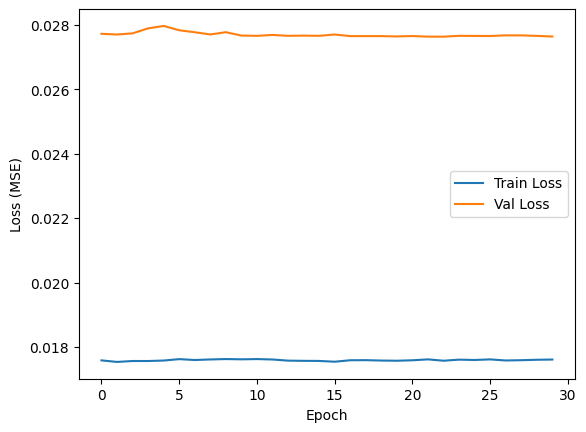

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Test MSE: 176.9650
Test RMSE: 13.3028


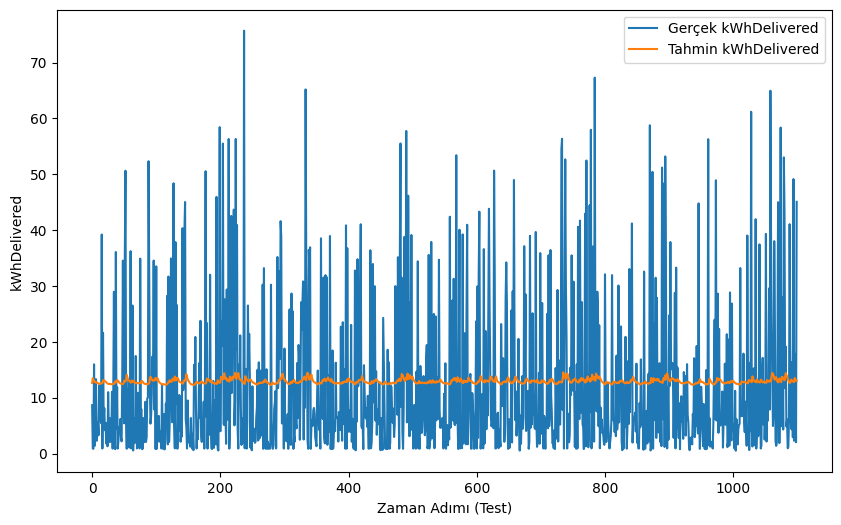

In [ ]:
y_pred_scaled = model.predict(X_test)

# y_pred_scaled'in shape'i (num_test_samples, 1)
# Bunu orijinal kWhDelivered birimine çevirmek için scaler.inverse_transform uygulayacağız
# Ancak scaler, (N, #features) şekil bekler, bu yüzden y_pred_scaled ve y_test'i uygun formatta array'e dönüştürmeliyiz.

y_pred_inv = scaler.inverse_transform(y_pred_scaled)  # Modelin tahmin ettiği değerler (orijinal ölçeğe dönmüş)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Performans metrikleri (örneğin MSE, RMSE vb.)
mse = np.mean((y_test_inv - y_pred_inv)**2)
rmse = np.sqrt(mse)

print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")

# Tahminleri grafikte karşılaştıralım
plt.figure(figsize=(10,6))
plt.plot(y_test_inv, label='Gerçek kWhDelivered')
plt.plot(y_pred_inv, label='Tahmin kWhDelivered')
plt.xlabel('Zaman Adımı (Test)')
plt.ylabel('kWhDelivered')
plt.legend()
plt.show()


In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 6.0 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    """
    Hiperparametreleri hp üzerinden alarak bir LSTM modeli inşa eder
    ve derlenmiş (compile) halde geri döndürür.
    """
    model = Sequential()

    # LSTM birim sayısını 32 ile 256 arasında 32'şer adımlarla arıyoruz
    lstm_units = hp.Int('units', min_value=32, max_value=256, step=32)

    # Tek LSTM katmanı kullanıyoruz, dilerseniz hp.Int ile 2 katman da deneyebilirsiniz
    model.add(
        LSTM(
            units=lstm_units,
            return_sequences=False,
            input_shape=(X_train.shape[1], X_train.shape[2])  # (look_back, feature_sayısı)
        )
    )

    # Dropout oranını 0.0 ile 0.5 arasında %10 adımlarla arayalım
    dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)
    model.add(Dropout(dropout_rate))

    # Çıkış katmanı (regresyon için aktivasyonsuz veya 'linear')
    model.add(Dense(1, activation='linear'))

    # Öğrenme oranını 1e-2, 1e-3, 1e-4 gibi seçeneklerden biriyle arayalım
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Modeli derleyelim
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mse'
    )

    return model


In [ ]:
# Hiperparametre arama (RandomSearch) tanımlayalım
# 'objective' olarak 'val_loss' (MSE) minimize edilecek
# 'max_trials' kaç farklı kombinasyon deneneceğini belirtir
# 'executions_per_trial' her kombinasyonun kaç defa yeniden eğitileceğini belirler (ortalama alınır).
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,               # kaç kombinasyon denensin
    executions_per_trial=1,      # her kombinasyonu 1 defa eğit
    overwrite=True,
    project_name='lstm_kwhdelivered_opt'
)

# Tuner'a vereceğimiz parametreler
# epochs ve batch_size gibi sabit değerler verebileceğimiz gibi,
# bunları da hp üzerinden aramak isterseniz build_model içine taşıyabilirsiniz.
tuner.search(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=16,
    shuffle=False
)

# Arama tamamlanınca en iyi modelleri alalım
best_hp = tuner.get_best_hyperparameters(1)[0] # Remove num_models= and pass 1 directly
print("En iyi hyperparametreler:", best_hp.values)

# En iyi modeli yeniden oluşturup eğitelim (ya da doğrudan tuner'dan alabiliriz)
best_model = tuner.hypermodel.build(best_hp)

history = best_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=16,
    shuffle=False
)


Trial 10 Complete [00h 01m 04s]
val_loss: 0.027740130200982094

Best val_loss So Far: 0.027601568028330803
Total elapsed time: 00h 26m 09s
En iyi hyperparametreler: {'units': 32, 'dropout_rate': 0.1, 'learning_rate': 0.001}
Epoch 1/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0133 - val_loss: 0.0276
Epoch 2/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0137 - val_loss: 0.0277
Epoch 3/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0137 - val_loss: 0.0279
Epoch 4/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0139 - val_loss: 0.0279
Epoch 5/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0139 - val_loss: 0.0278
Epoch 6/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0140 - val_loss: 0.0279
Epoch 7/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0140 - val_loss: 0.0278
Epoch 8/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0140 - val_loss: 0.0277
Epoch 9/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0140 - val_loss: 0.0277
Ep

In [ ]:
import numpy as np

y_pred_scaled = best_model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred_scaled)  # orijinal ölçeğe çevir
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

mse = np.mean((y_test_inv - y_pred_inv)**2)
rmse = np.sqrt(mse)

print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Test MSE: 176.4040
Test RMSE: 13.2817


In [ ]:
import pandas as pd
import numpy as np

# Model kütüphaneleri
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Orijinal veriyi kopyalayalım
df = df_merged.copy()

# 1) Hedef sütunumuz "kWhDelivered"
#    Boş değer (NaN) içeren satırları atıyoruz.
df.dropna(subset=['kWhDelivered'], inplace=True)

# 2) Kullanacağımız bazı özellikleri (features) seçelim.
#    Elinizdeki uygun sütunlara göre burayı düzenleyin.
features = [
    'WhPerMile',
    'kWhRequested',
    'milesRequested',
    'minutesAvailable',
    # 'paymentRequired',  # eğer kategorik ise dönüştürmek gerekebilir
    # 'başkaBirSütun',    # varsa ek sütun ekleyin
]

# 3) Eksik (NaN) değerleri doldurun veya atın
df[features] = df[features].fillna(0)

# 4) Bağımsız değişkenleri (X) ve hedefi (y) ayıralım
X = df[features]
y = df['kWhDelivered']

# 5) Eğitim ve test setlerini ayıralım
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


In [ ]:
# Basit model
xgb_reg = xgb.XGBRegressor(
    random_state=42
)

# Eğitimi başlatalım
xgb_reg.fit(X_train, y_train)

# Test seti tahminleri
y_pred = xgb_reg.predict(X_test)

# Performans metrikleri
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== Basit XGBoost Modeli Sonuçları ===")
print(f"MSE : {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2 : {r2:.4f}")


=== Basit XGBoost Modeli Sonuçları ===
MSE : 142.4486
RMSE: 11.9352
R^2 : -0.0904


In [ ]:
!pip install --upgrade xgboost

In [ ]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 53.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [ ]:
df.head()

,connectionTime,disconnectTime,kWhDelivered,WhPerMile,kWhRequested,milesRequested,minutesAvailable,paymentRequired
0,2020-01-02 01:12:29,2020-01-02 04:38:39,8.336,400.0,24.0,60.0,125.0,True
1,2020-01-02 04:18:06,2020-01-03 00:06:13,14.731,400.0,40.0,100.0,583.0,True
2,2020-01-02 16:05:15,2020-01-03 00:11:51,2.083,400.0,8.0,20.0,590.0,True
3,2020-01-02 16:06:34,2020-01-02 17:04:02,0.855,0.0,0.0,0.0,0.0,NaN
4,2020-01-02 16:31:35,2020-01-03 00:29:28,50.788,360.0,64.8,180.0,603.0,True


In [ ]:
from datetime import datetime
df["connectionTime"] = pd.to_datetime(df["connectionTime"])
df["disconnectTime"] = pd.to_datetime(df["disconnectTime"])
df["Hour"] = df["connectionTime"].dt.hour
df["Month"] = df["connectionTime"].dt.month
df["Year"] = df["connectionTime"].dt.year
df["ChargingDuration"] = (
    df["disconnectTime"] - df["connectionTime"]
).dt.total_seconds() / 3600
df["ChargingRate(kW)"] = df["kWhDelivered"] / df["ChargingDuration"]
df["Duration_Hour"] = df["ChargingDuration"] * df["Hour"]
df["Duration_Rate"] = df["ChargingDuration"] * df["ChargingRate(kW)"]
df["Hour_Rate"] = df["Hour"] * df["ChargingRate(kW)"]

In [ ]:
df.head()

,connectionTime,disconnectTime,kWhDelivered,WhPerMile,kWhRequested,milesRequested,minutesAvailable,paymentRequired,Hour,Month,Year,ChargingDuration,ChargingRate(kW),Duration_Hour,Duration_Rate,Hour_Rate
0,2020-01-02 01:12:29,2020-01-02 04:38:39,8.336,400.0,24.0,60.0,125.0,True,1,1,2020,3.436111,2.425998,3.436111,8.336,2.425998
1,2020-01-02 04:18:06,2020-01-03 00:06:13,14.731,400.0,40.0,100.0,583.0,True,4,1,2020,19.801944,0.743917,79.207778,14.731,2.975667
2,2020-01-02 16:05:15,2020-01-03 00:11:51,2.083,400.0,8.0,20.0,590.0,True,16,1,2020,8.110000,0.256843,129.760000,2.083,4.109494
3,2020-01-02 16:06:34,2020-01-02 17:04:02,0.855,0.0,0.0,0.0,0.0,NaN,16,1,2020,0.957778,0.892691,15.324444,0.855,14.283063
4,2020-01-02 16:31:35,2020-01-03 00:29:28,50.788,360.0,64.8,180.0,603.0,True,16,1,2020,7.964722,6.376619,127.435556,50.788,102.025906


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5506 entries, 0 to 5505
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   connectionTime    5506 non-null   datetime64[ns]
 1   disconnectTime    5506 non-null   datetime64[ns]
 2   kWhDelivered      5506 non-null   float64       
 3   WhPerMile         5506 non-null   float64       
 4   kWhRequested      5506 non-null   float64       
 5   milesRequested    5506 non-null   float64       
 6   minutesAvailable  5506 non-null   float64       
 7   paymentRequired   4884 non-null   object        
 8   Hour              5506 non-null   int32         
 9   Month             5506 non-null   int32         
 10  Year              5506 non-null   int32         
 11  ChargingDuration  5506 non-null   float64       
 12  ChargingRate(kW)  5506 non-null   float64       
 13  Duration_Hour     5506 non-null   float64       
 14  Duration_Rate     5506 n

In [ ]:
df.head()

,kWhDelivered,WhPerMile,kWhRequested,milesRequested,minutesAvailable,Hour,Month,Year,ChargingDuration,ChargingRate(kW),Duration_Hour,Duration_Rate,Hour_Rate
0,8.336,400.0,24.0,60.0,125.0,1,1,2020,3.436111,2.425998,3.436111,8.336,2.425998
1,14.731,400.0,40.0,100.0,583.0,4,1,2020,19.801944,0.743917,79.207778,14.731,2.975667
2,2.083,400.0,8.0,20.0,590.0,16,1,2020,8.110000,0.256843,129.760000,2.083,4.109494
3,0.855,0.0,0.0,0.0,0.0,16,1,2020,0.957778,0.892691,15.324444,0.855,14.283063
4,50.788,360.0,64.8,180.0,603.0,16,1,2020,7.964722,6.376619,127.435556,50.788,102.025906


In [ ]:
#Python OOP yapısı kullanılmıştır.


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor


from sklearn import metrics,preprocessing, model_selection
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold,train_test_split,cross_val_score,ShuffleSplit,GridSearchCV,RandomizedSearchCV
import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

class RegressionModel:
    def __init__(self, X,y):
        self.X=X
        self.y=y
        self.X_train,self.X_test,self.y_train,self.y_test=train_test_split(self.X,self.y,test_size=0.33,random_state=42)


    def LinearRegression(self):
        print("*********Linear Regression*********")
        linear_model = LinearRegression()
        linear_model.fit(self.X_train, self.y_train)
        y_pred = linear_model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)

    def RidgeRegression(self):
        print("*********Ridge Regression*********")
        ridge_model = Ridge()
        ridge_model.fit(self.X_train, self.y_train)
        y_pred = ridge_model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)



    def LassoRegression(self):
        print("*********Lasso Regression*********")
        lasso_model = Lasso()
        lasso_model.fit(self.X_train, self.y_train)
        y_pred = lasso_model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)



    def SVMRegression(self):
        print("*********Support Vector Regression*********")
        svmreg_model = SVR()
        svmreg_model.fit(self.X_train, self.y_train)
        y_pred = svmreg_model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)


    def KNNRegression(self):
        print("*********KNN Regression*********")
        KNNreg=KNeighborsRegressor()
        KNNreg.fit(self.X_train, self.y_train)
        y_pred = KNNreg.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)


    def DecisionTreeRegression(self):
        print("*********Decision Tree Regression*********")
        dtree_model = DecisionTreeRegressor()
        dtree_model.fit(self.X_train, self.y_train)
        y_pred = dtree_model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)


    def RandomForestRegressor(self):
        print("**** Random Forest Regression")
        rfr_model = RandomForestRegressor()
        rfr_model.fit(self.X_train, self.y_train)
        y_pred = rfr_model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)


    def XGBRegression(self):
        print("**********XGBOOST Regression*********")
        xgb_reg=XGBRegressor()
        xgb_reg.fit(self.X_train, self.y_train)
        y_pred = xgb_reg.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)


    def GBMRegressor(self):
        print("**********GBM Regression*********")
        gb_reg = GradientBoostingRegressor()
        gb_reg.fit(self.X_train, self.y_train)
        y_pred = gb_reg.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)


    def LightGBMRegressor(self):
        print("**********LGBM Regression*********")
        lgb_reg=LGBMRegressor()
        lgb_reg.fit(self.X_train, self.y_train)
        y_pred = lgb_reg.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)


    def MLPCRegressor(self):
        print("**********MLPC Regression*********")
        mlp_reg = MLPRegressor()
        mlp_reg.fit(self.X_train, self.y_train)
        y_pred = mlp_reg.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)











/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
X = df.drop("kWhDelivered", axis=1)

y = df["kWhDelivered"]

In [ ]:
reg=RegressionModel(X,y)

In [ ]:
reg.SVMRegression()

*********Support Vector Regression*********
MSE: 107.59765490240292
MAE: 6.225262768547362
RMSE: 10.372928945211324
R-squared: 0.16318433460189652


In [ ]:
import pandas as pd
import numpy as np

# 1) Scikit-learn ve Keras kütüphanelerini içe aktaralım
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 4) Eğitim ve Test seti oluşturma (Train/Test Split)
# ------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5) İsteğe bağlı: Özellikleri ölçeklendirme (StandardScaler)
# ------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 7) Modelin tahminleri ve performans metrikleri
y_pred_lr = lin_reg.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("=== Linear Regression Sonuçları ===")
print(f"MSE (Mean Squared Error): {mse_lr:.4f}")
print(f"R^2 (Coefficient of Determination): {r2_lr:.4f}\n")

# ==============================================================================
# BÖLÜM B) DERİN ÖĞRENME (Yapay Sinir Ağı) İLE REGRESYON
# ==============================================================================
# 8) Keras/TensorFlow ile basit bir tam bağlantılı (dense) yapay sinir ağı modeli kuralım
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))  # 1. katman
model.add(Dense(32, activation='relu'))                                         # 2. katman
model.add(Dense(1, activation='linear'))                                        # Çıkış katmanı (regresyon)

# 9) Modeli derleyelim (compile)
model.compile(optimizer='adam', loss='mse')  # loss fonksiyonu olarak MSE kullandık

# 10) Modeli eğitelim (fit)
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,   # eğitim verisinin %20'si validation
    epochs=50,              # kaç tur (epoch) eğitim yapılacağı
    batch_size=16,          # her iterasyonda kaç örneğin işleneceği
    verbose=1
)

# 11) Modelin test setindeki performansını inceleyelim
y_pred_nn = model.predict(X_test_scaled)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("=== Derin Öğrenme (Yapay Sinir Ağı) Sonuçları ===")
print(f"MSE (Mean Squared Error): {mse_nn:.4f}")
print(f"R^2 (Coefficient of Determination): {r2_nn:.4f}")


=== Linear Regression Sonuçları ===
MSE (Mean Squared Error): 0.0000
R^2 (Coefficient of Determination): 1.0000



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 183.1964 - val_loss: 34.8352
Epoch 2/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17.7212 - val_loss: 2.6470
Epoch 3/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5779 - val_loss: 0.8409
Epoch 4/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7121 - val_loss: 0.4554
Epoch 5/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3341 - val_loss: 0.2668
Epoch 6/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2240 - val_loss: 0.1935
Epoch 7/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1692 - val_loss: 0.1544
Epoch 8/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1038 - val_loss: 0.1396
Epoch 9/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1114 - val_loss: 0.1040
Epoch 10/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0692 - val_loss: 0.1117
Epoch 11/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0805 - val_loss: 0.0936
Epoch 12/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/